## Importacion de librerias que se usaran

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from pandas.plotting import scatter_matrix

## IMPORTACION DE CSV TRAIN Y TEST

In [4]:
test=pd.read_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2\Datathon\properties_colombia_test.csv')
data=pd.read_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2\Datathon\properties_colombia_train.csv')

# Examinar datos y luego normalizar

In [5]:
data.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

**Elección de las columnas que no se usarán para el modelo**

* Las columnas que contienen fechas nos la utilizo ya que la informacion es del mismo periodo de tiempo
* lat y lon,no las voy a utilizar ya que usare 'geometry', que tiene la misma info
* currency no es relevante para el modelo,ya que estan practicamente todas en la misma moneda,excepto 8
* l1 no la usare porque tiene solo una categoria
* l4 no la usare porque contiene demasiados datos nulos
* l5 no la usare porque contiene demasiados datos nulos
* l6 no la usare porque contiene demasiados datos nulos

**Se determina que del promedio para arriba de la columna 'price' es caro, representado con '1' y del promedio para abajo es barato, representado con un '0'**

In [6]:
#saco promedio de precio para clasificar en base a este numero
promedio=data['price'].mean()

In [7]:
#creo la columna target y clasifico segun promedio en caro y barato
data['target']=np.where(data['price']>=promedio,1,0)

**Evaluación y normalización de cada columna**

In [8]:
#cuantas categorias tiene la columna l1--> no tiene valor para la prediccion porque es una unica categoria
data['l1'].value_counts()

Colombia    197549
Name: l1, dtype: int64

In [ ]:
#cuantas categorias tiene la columna l2
data['l2'].value_counts()

In [ ]:
#paso a numeros la columna 'l2' y creo la columna ciudades 
codificador=OrdinalEncoder()
data['ciudades']=codificador.fit_transform(data[['l2']])

In [45]:
#cuantas categorias tiene la columna l3
data['l3'].value_counts()

Medellín         43404
Bogotá D.C       28731
Cali             20846
Barranquilla     15133
Manizales        14128
                 ...  
Circasia             1
Sibaté               1
Maní                 1
Vianí                1
Quebradanegra        1
Name: l3, Length: 293, dtype: int64

In [46]:
#paso a numeros la columna 'l3' y creo la columna provincia
codificador=OrdinalEncoder()
data['provincia']=codificador.fit_transform(data[['l3']])

In [72]:
#saco promedio de provincia
prom_provincia=data['provincia'].mean()
#reemplazo nulos con promedio en provincia
data['provincia']=data['provincia'].fillna(prom_provincia)

In [54]:
#cuantas categorias tiene la columna 'surface_covered'
data['surface_covered'].value_counts()

60.0      210
70.0      149
80.0      143
90.0      140
65.0      132
         ... 
787.0       1
2735.0      1
1335.0      1
1222.0      1
526.0       1
Name: surface_covered, Length: 783, dtype: int64

In [55]:
#paso a numeros la columna 'surface_covered' y creo la columna 'superficie_cubierta'
codificador=OrdinalEncoder()
data['superficie_cubierta']=codificador.fit_transform(data[['surface_covered']])

In [70]:
#saco promedio de superficie cubierta
prom_sup_cub=data['superficie_cubierta'].mean()
#reemplazo nulos de superficie cubierta con promedio
data['superficie_cubierta']=data['superficie_cubierta'].fillna(prom_sup_cub)

In [9]:
#cuantas categorias tiene la columna ad_type --> no tiene valor para la prediccion porque es una unica categoria
data['ad_type'].value_counts()

Propiedad    197549
Name: ad_type, dtype: int64

In [10]:
#verificamos cuantas categorias tiene---> tiene 8 categorias
data['property_type'].value_counts()

Apartamento        100527
Casa                60500
Otro                16530
Lote                16507
Local comercial      1255
Finca                1135
Oficina              1085
Parqueadero            10
Name: property_type, dtype: int64

In [11]:
#pasamos a numerica la columna 'property_type' y creamos una nueva columna que se llamara tipo
codificador=OrdinalEncoder()
data['tipo']=codificador.fit_transform(data[['property_type']])

In [12]:
#verificamos cuantas categorias tiene---> solo tiene ventas, por lo que no la incluiremos en el modelo
data['operation_type'].value_counts()

Venta    197549
Name: operation_type, dtype: int64

In [13]:
#verificamos cuantas categorias tiene 'geometry'
data['geometry'].value_counts()

POINT EMPTY                         49498
POINT (-73.112 7.119)                 264
POINT (-75.572 6.203)                 259
POINT (-76.554 3.258)                 208
POINT (-74.1376942 4.6303361)         143
                                    ...  
POINT (-75.662 4.542)                   1
POINT (-74.77732886 10.98746865)        1
POINT (-74.078 4.645)                   1
POINT (-74.029133 4.707117)             1
POINT (-73.106 7.064)                   1
Name: geometry, Length: 62807, dtype: int64

In [14]:
#pasamos a numerica la columna 'geometry' y creamos una nueva columna que se llamara ubicacion
codificador=OrdinalEncoder()
data['ubicacion']=codificador.fit_transform(data[['geometry']])

In [15]:
#calculo promedio de rooms para reemplazar datos nulos
prom_room=round(data['rooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
data['rooms']=data['rooms'].fillna(prom_room)

In [16]:
#calculo promedio de bedrooms para reemplazar datos nulos
prom_bedroom=round(data['bedrooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
data['bedrooms']=data['bedrooms'].fillna(prom_bedroom)

In [17]:
#saco promedio de superficie total
sup=data['surface_total'].mean()
#reemplazo nulos de superficie total con promedio
data['superficie_total']=data['surface_total'].fillna(sup)

In [18]:
#reemplazo nulos en bathroom por 1, ya que al menos un baño hay en cada casa
data['bathrooms']=data['bathrooms'].fillna(1)

## Creo DataFrames con las columnas normalizadas

In [93]:
#Data Frame solo con algunas columnas
atrib=pd.DataFrame(data[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion','target']])

In [74]:
#DataFrame con todas las columnas consideradas
atributos=pd.DataFrame(data[['rooms','bedrooms','bathrooms','superficie_total','superficie_cubierta','ciudades','provincia','tipo','ubicacion','target']])

In [75]:
atributos.isnull().sum()

rooms                  0
bedrooms               0
bathrooms              0
superficie_total       0
superficie_cubierta    0
ciudades               0
provincia              0
tipo                   0
ubicacion              0
target                 0
dtype: int64

# Graficamos

array([[<AxesSubplot: xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='bedrooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='bathrooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='superficie_total', ylabel='rooms'>,
        <AxesSubplot: xlabel='superficie_cubierta', ylabel='rooms'>,
        <AxesSubplot: xlabel='ciudades', ylabel='rooms'>,
        <AxesSubplot: xlabel='provincia', ylabel='rooms'>,
        <AxesSubplot: xlabel='tipo', ylabel='rooms'>,
        <AxesSubplot: xlabel='ubicacion', ylabel='rooms'>,
        <AxesSubplot: xlabel='target', ylabel='rooms'>],
       [<AxesSubplot: xlabel='rooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='superficie_total', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='superficie_cubierta', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='ciudades', ylabel='bedrooms'>,
        <AxesSubplot: x

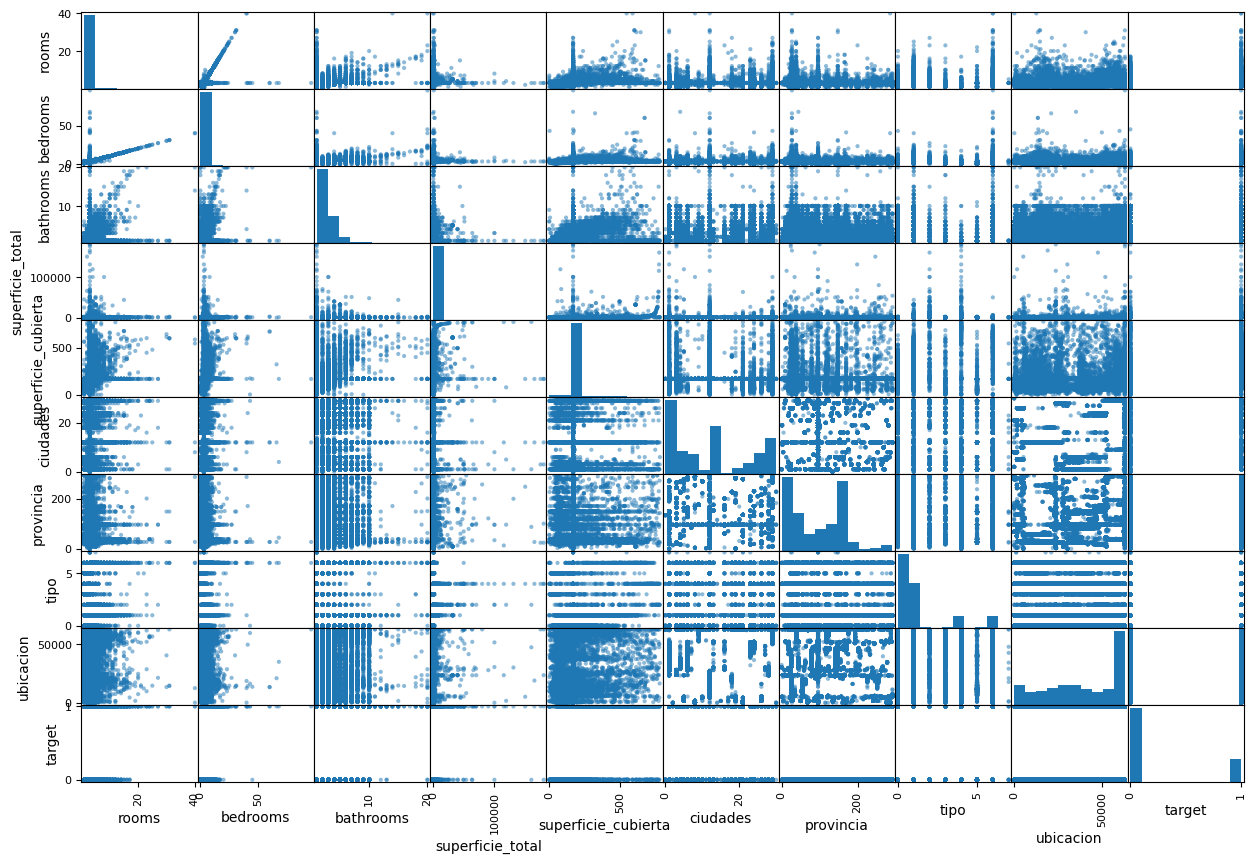

In [95]:
#solo con las features numericas
scatter_matrix(atributos,figsize=(15,10))

* Correlación

<AxesSubplot: >

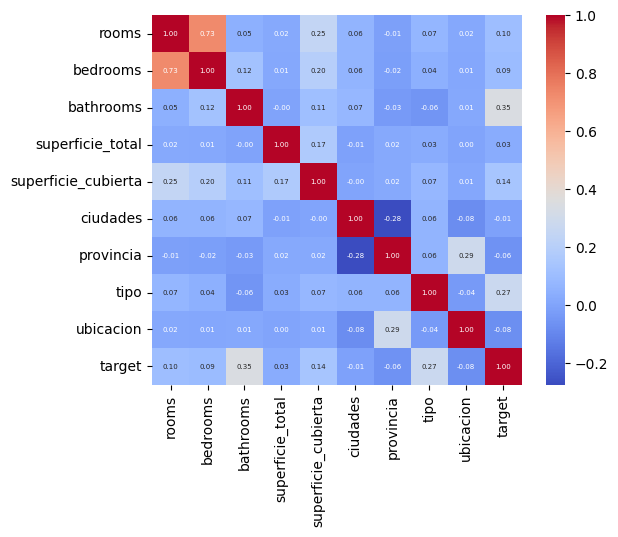

In [77]:
corr =atributos.corr()
#corr = data.drop(columns=['Sales']).corr()--> si quieroo sacar la columna objeto
sns.heatmap( corr, cbar = True,annot=True, square = True,  fmt= '.2f',annot_kws={'size': 5},
           xticklabels=corr.columns,
           yticklabels=corr.columns,
           cmap= 'coolwarm')

## APLICAMOS LOS MISMOS CAMBIOS A TEST

In [22]:
#pasamos a numerica la columna 'property_type' y creamos una nueva columna que se llamara tipo
codificador=OrdinalEncoder()
test['tipo']=codificador.fit_transform(test[['property_type']])

In [23]:
#paso a numeros la columna 'l2' y creo la columna ciudades 
codificador=OrdinalEncoder()
test['ciudades']=codificador.fit_transform(test[['l2']])

In [78]:
#paso a numeros la columna 'l3' y creo la columna provincia
codificador=OrdinalEncoder()
test['provincia']=codificador.fit_transform(test[['l3']])


In [79]:
#saco promedio de provincia
prom_provincia=test['provincia'].mean()
#reemplazo nulos con promedio en provincia
test['provincia']=test['provincia'].fillna(prom_provincia)

In [24]:
#pasamos a numerica la columna 'geometry' y creamos una nueva columna que se llamara ubicacion
codificador=OrdinalEncoder()
test['ubicacion']=codificador.fit_transform(test[['geometry']])

In [25]:
#calculo promedio de rooms para reemplazar datos nulos
prom_room=round(test['rooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
test['rooms']=test['rooms'].fillna(prom_room)

In [26]:
#calculo promedio de bedrooms para reemplazar datos nulos
prom_bedroom=round(test['bedrooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
test['bedrooms']=test['bedrooms'].fillna(prom_bedroom)

In [82]:
#paso a numeros la columna 'l4' y creo la columna barrio
codificador=OrdinalEncoder()
test['superficie_cubierta']=codificador.fit_transform(test[['surface_covered']])

In [83]:
#saco promedio de superficie cubierta
prom_sup_cub=data['superficie_cubierta'].mean()
#reemplazo nulos de superficie cubierta con promedio
test['superficie_cubierta']=test['superficie_cubierta'].fillna(prom_sup_cub)

In [27]:
#saco promedio de superficie total
sup=test['surface_total'].mean()
#reemplazo nulos de superficie total con promedio
test['superficie_total']=test['surface_total'].fillna(sup)

In [28]:
#reemplazo nulos en bathroom por 1, ya que al menos un baño hay en cada casa
test['bathrooms']=test['bathrooms'].fillna(1)

## Creo DataFrames con las columnas normalizadas de test

In [84]:
atrib_test=pd.DataFrame(data[['rooms','bedrooms','bathrooms','superficie_total','superficie_cubierta','ciudades','provincia','tipo','ubicacion']])

In [29]:
#incluiremos en el grafico las features numericas
atributos_test=pd.DataFrame(test[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion']])

# Modelo Random Forest

In [107]:
#separo mis datos en prueba y test para poder hacer un modelo mas acertado, uso features numericas
x_train,x_test,y_train,y_test=train_test_split(data[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion']],data['target'],test_size=0.3)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
bosque= RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',bootstrap=True,max_samples=2/3,oob_score=True)

In [110]:
bosque.fit(x_train.values,y_train.values)

RandomForestClassifier(max_samples=0.6666666666666666, oob_score=True)

In [111]:
y_pred=bosque.predict(x_test.values)

In [112]:
accuracy=bosque.score(x_test.values,y_test.values)
accuracy

0.8844174470598161

In [113]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7403358342265095

# Pruebo modelo con mas columnas

In [96]:
#separo mis datos en prueba y test para poder hacer un modelo mas acertado, uso features numericas
x_entre,x_prueb,y_entre,y_prueb=train_test_split(atributos[['rooms','bedrooms','bathrooms','superficie_total','superficie_cubierta','ciudades','provincia','tipo','ubicacion']],atributos['target'],test_size=0.3)

In [97]:
bosque= RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',bootstrap=True,max_samples=2/3,oob_score=True)

In [98]:
bosque.fit(x_entre.values,y_entre.values)

RandomForestClassifier(max_samples=0.6666666666666666, oob_score=True)

In [100]:
y_pred2=bosque.predict(x_prueb.values)

* Evaluo mi modelo

In [102]:
accuracy=bosque.score(x_prueb.values,y_prueb.values)
accuracy

0.8902387581203071

In [103]:
from sklearn.metrics import recall_score
recall_score(y_prueb,y_pred2)

0.74812734082397

**El accuracy y recall mejoraron respecto a la anterior evaluación, por lo que me quedo con este modelo para pasar el test**

# Pruebo mi modelo con los datos de Test

In [104]:
pred=bosque.predict(atrib_test)
pred

c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])

* Convierto en DataFrame

In [105]:
MarluVigil=pd.DataFrame(pred)
MarluVigil

,0
0,1
1,0
2,0
3,0
4,0
...,...
197544,0
197545,0
197546,0
197547,0


* Exporto a archivo csv

In [106]:
MarluVigil.to_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2\MarluVigil.csv',index=False)